In [27]:
#| code-fold: true
import warnings
warnings.filterwarnings("ignore")


import os
os.chdir("/project/persistent-exclusion-process")

import h5py
import glob

from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from cmcrameri import cm
import numpy as np
import seaborn as sns
import pandas as pd

from src.utils import get_ds_iters
from src.plot_utils import get_plot_configs

files = glob.glob("no_roll_data/dataset_tumble_*_0.25.h5")
kernel = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
num = []
big = []
for idx, f in enumerate(sorted(files)):
    hf = h5py.File(f, "r")
    iters = get_ds_iters(hf.keys())

    for idx2 in range(300):
        img = hf[f"conf_{iters[idx2]}"]
        labelled, nlabels = ndimage.label(img, structure=kernel)
        lb = labelled.flatten()
        big.append(np.max(np.bincount(lb)[1:]))
        num.append(nlabels)

<Axes: xlabel='Tumbling rates, $\\alpha$', ylabel='Biggest cluster volume'>

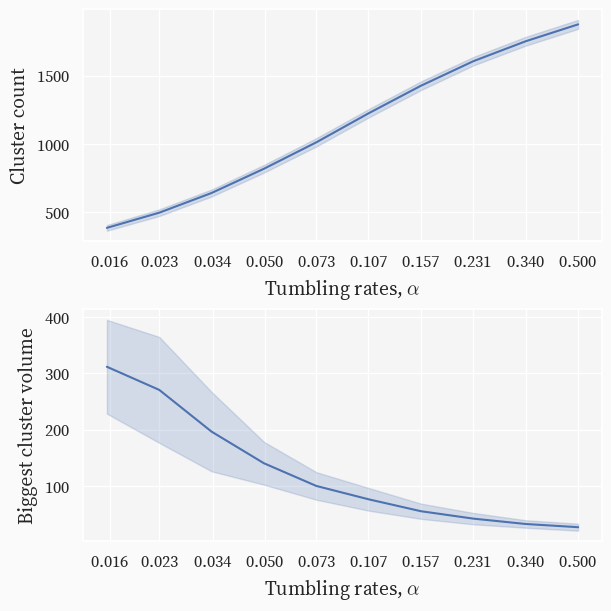

In [28]:
#| code-fold: true
plot_configs = get_plot_configs()
plot_configs["axes.facecolor"] = [0.96, 0.96, 0.96, 1]
plot_configs["figure.facecolor"] = [0.98, 0.98, 0.98, 1]
sns.set(rc=plot_configs)
plot_configs["xtick.labelsize"] = 12
plot_configs["ytick.labelsize"] = 12
plt.rcParams.update(plot_configs)

tumbles = np.logspace(-6, -1, 10, base=2)
df = pd.DataFrame()
df.insert(0, "alpha", np.repeat(tumbles,300))
df.insert(1, "numclus", num)
df.insert(2, "bigsize", big)


fig, (ax1,ax2) = plt.subplots(
    2,
    1,
    figsize=(6, 6),
    constrained_layout=True
)


ax1.set_xscale('log')
ax1.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax1.set_xticks(np.round(tumbles,3))
ax1.set(xlabel=r"Tumbling rates, $\alpha$", ylabel=r"Cluster count")
ax2.set_xscale('log')
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax2.set_xticks(np.round(tumbles,3))
ax2.set(xlabel=r"Tumbling rates, $\alpha$", ylabel=r"Biggest cluster volume")
sns.lineplot(ax=ax1, data=df, x="alpha", y="numclus", errorbar="sd")
sns.lineplot(ax=ax2, data=df, x="alpha", y="bigsize", errorbar="sd")